In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
import mne

In [4]:
import pandas as pd

In [5]:
from scipy.io import loadmat

In [6]:
! pip3 install sklearn

You are using pip version 18.0, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
subject = "S1"

In [13]:
session = loadmat('data/{}.mat'.format(subject))

In [26]:
session_df = pd.DataFrame(session["y"], columns=[
    "C" + str(i) for i in range(8)
])

In [36]:
sfreq = session["fs"][0][0]

In [28]:
session_df["Time"] = session_df.index / session["fs"][0][0]

In [59]:
session_df["Trigger"] = session["trig"]
session_df.loc[session_df["Trigger"] == -1, "Trigger"] = 2

# EDA

In [60]:
session_df["Trigger"].value_counts()

0    59671
2     1050
1      150
Name: Trigger, dtype: int64

# Draw raw ERP

In [63]:
channels = [
    "C" + str(i) for i in range(8)
] + ["Trigger"]

info = mne.create_info(ch_names=channels, sfreq=sfreq)

In [64]:
raw = mne.io.RawArray(session_df[channels].values.T, info)

Creating RawArray with float64 data, n_channels=9, n_times=60871
    Range : 0 ... 60870 =      0.000 ...   243.480 secs
Ready.


In [65]:
channel_types = {c: 'eeg' for c in channels}
channel_types['Trigger'] = 'stim'

In [66]:
raw.set_channel_types(channel_types)

The unit for channel(s) C0, C1, C2, C3, C4, C5, C6, C7 has changed from NA to V.


<ipython-input-66-656cff14ccc4>:1: RuntimeWarning: The unit for channel(s) C0, C1, C2, C3, C4, C5, C6, C7 has changed from NA to V.
  raw.set_channel_types(channel_types)


In [67]:
events = mne.find_events(raw, 'Trigger')

1200 events found
Event IDs: [1 2]


In [68]:
events

array([[ 1254,     0,     2],
       [ 1299,     0,     2],
       [ 1342,     0,     2],
       ...,
       [59446,     0,     2],
       [59489,     0,     2],
       [59534,     0,     2]])

In [69]:
def get_epochs(raw, event_id):
    global events
    epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.1, tmax=0.5)
    epochs = epochs.apply_baseline((-0.1, 0))
    return epochs

150 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Applying baseline correction (mode: mean)
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-70-1d52a3096101>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  get_epochs(raw, 1).average().plot()


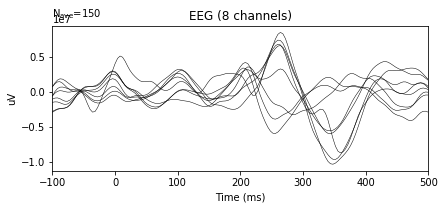

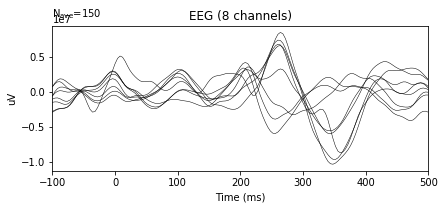

In [70]:
get_epochs(raw, 1).average().plot()

1050 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Applying baseline correction (mode: mean)
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-73-53e6d97061bd>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  get_epochs(raw, 2).average().plot()


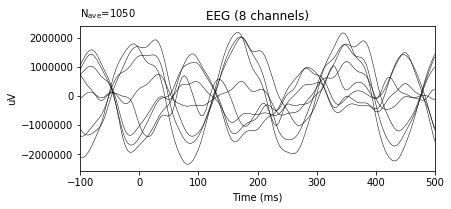

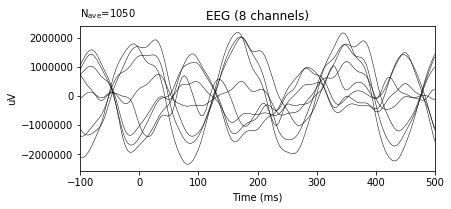

In [73]:
get_epochs(raw, 2).average().plot()